In [44]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re

In [45]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  # Catch errors immediately

import torch
torch.cuda.empty_cache()

In [46]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    prediction_loss_euclidean,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss
    )

In [47]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    plot_euclidean_distance_over_time,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    test_model_in_all_trajectories_in_df,
    test_model_variance_in_all_trajectories_in_df,
    plot_prediction_losses,
    plot_variance_losses,
    test_model_with_varying_observed_points,
    test_model_variance_with_varying_observed_points,
    compute_jacobian_functional,
    compute_symplectic_product,
    check_canonical_transformation,
    test_canonical_tranformation_on_trajectory,
    test_model_in_all_trajectories_with_different_single_observation_in_df,
    )

In [48]:
save_dir_path = "./save_directory_noisy_low_samples_2" 


In [49]:
with open("all_dataframes_low_samples.pkl", "rb") as f:
    loaded_dfs_low_samples = pickle.load(f)

# Access them like before:
train_df_low_samples = loaded_dfs_low_samples['train_df_low_samples']
val_df_low_samples = loaded_dfs_low_samples['val_df_low_samples']
test_df_low_samples = loaded_dfs_low_samples['test_df_low_samples']

train_id_df_low_samples = loaded_dfs_low_samples['train_id_df_low_samples']
val_id_df_low_samples = loaded_dfs_low_samples['val_id_df_low_samples']
test_id_df_low_samples = loaded_dfs_low_samples['test_id_df_low_samples']

with open("df_high_energy_low_samples.pkl", "rb") as f:
    df_high_energy_low_samples = pickle.load(f)

val_df_high_energy_low_samples = df_high_energy_low_samples['val_df_high_energy_low_samples']
val_id_df_high_energy_low_samples = df_high_energy_low_samples['val_id_df_high_energy_low_samples']

test_df_high_energy_low_samples = df_high_energy_low_samples['test_df_high_energy_low_samples']
test_id_df_high_energy_low_samples = df_high_energy_low_samples['test_id_df_high_energy_low_samples']

In [50]:
train_id_df_low_samples_added = add_phi_A_columns(train_id_df_low_samples)
val_id_df_low_samples_added = add_phi_A_columns(val_id_df_low_samples)
val_id_df_high_energy_low_samples_added = add_phi_A_columns(val_id_df_high_energy_low_samples)


📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 317 with the value: 0.5512, the losses of the last 5 epochs are: ['0.5765', '0.5679', '0.5997', '0.5913', '0.5539']
  Lowest loss of metric 'val_variance_loss_high_energy' recorded in epoch 318 with the value: 0.8937, the losses of the last 5 epochs are: ['1.2994', '1.0433', '1.0396', '0.9962', '1.0055']
  Lowest loss of metric 'val_prediction_loss_high_energy' recorded in epoch 326 with the value: 0.7062, the losses of the last 5 epochs are: ['0.7423', '0.7062', '0.7119', '0.7154', '0.7186']
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 319 with the value: 0.2617, the losses of the last 5 epochs are: ['0.2659', '0.2683', '0.2710', '0.2793', '0.2782']
  Lowest loss of metric 'val_prediction_loss_training_set' recorded in epoch 325 with the value: 0.5337, the losses of the last 5 epochs are: ['0.5337', '0.5404', '0.5542', '0.5514', '0.5358']
  Lowest loss of metric 'val_var

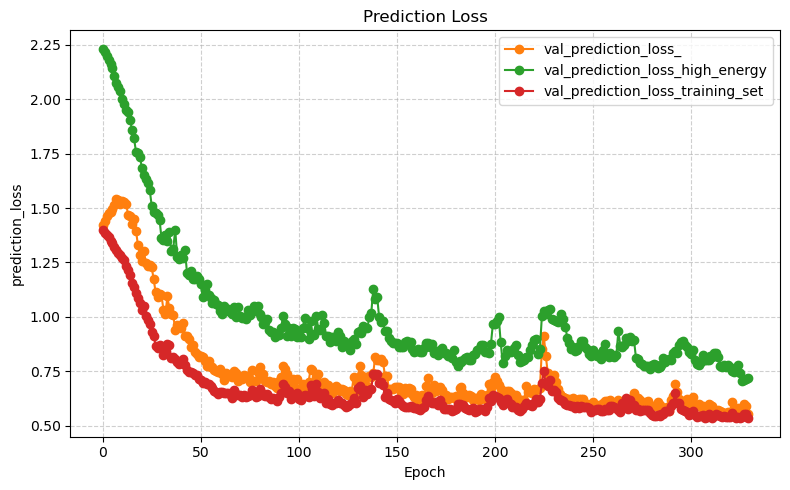

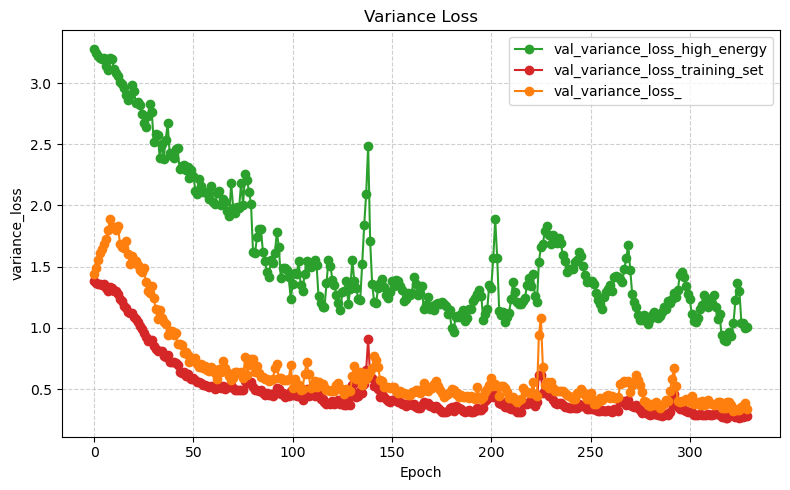

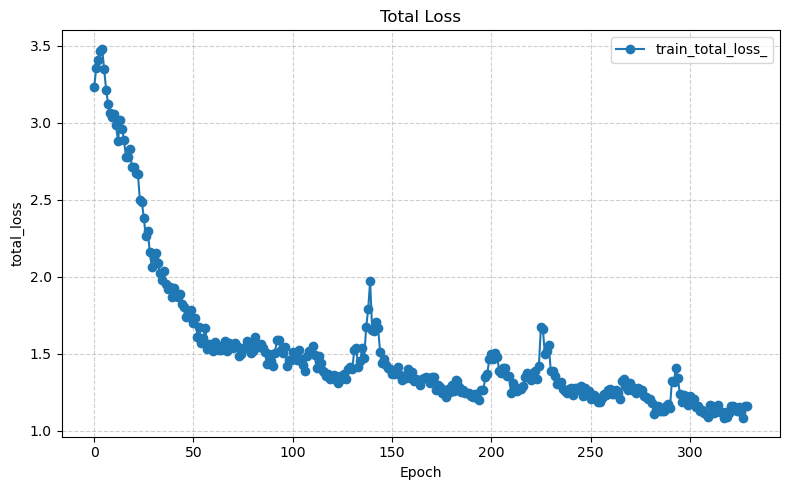

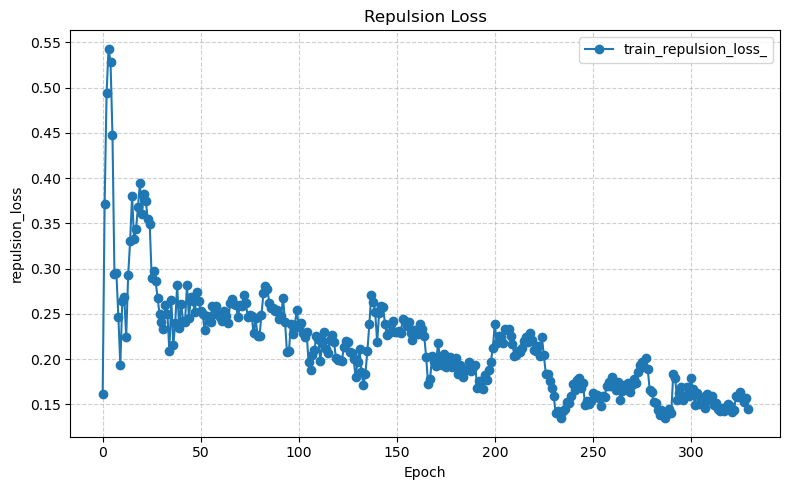

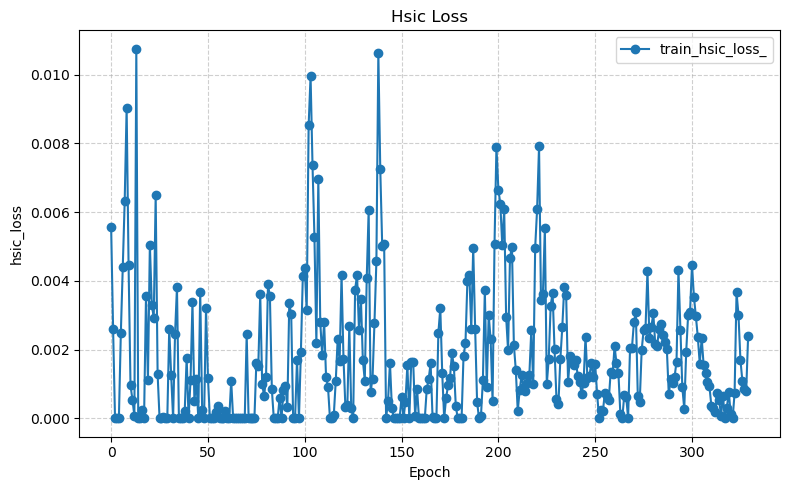

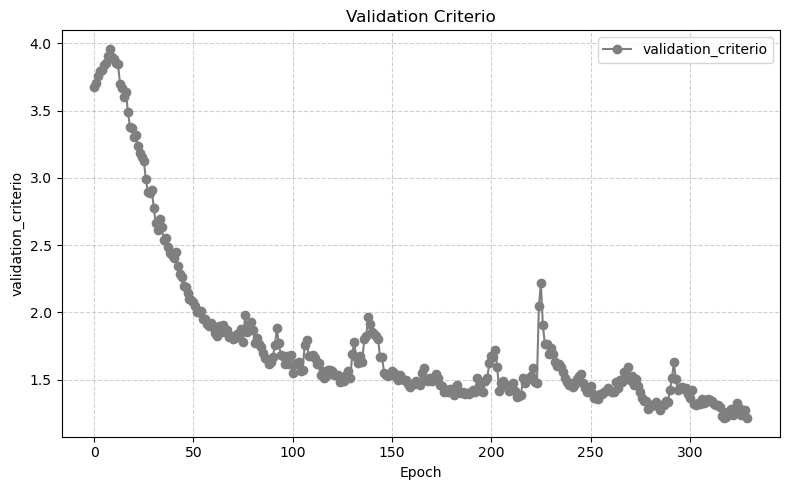

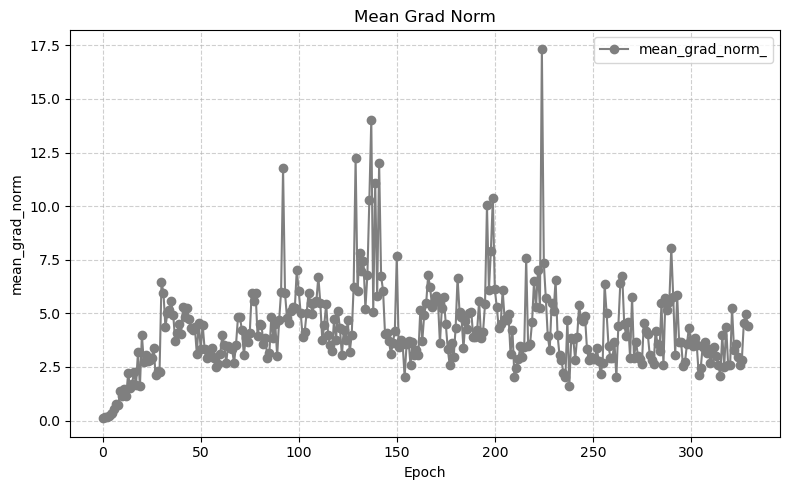

In [51]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "val_variance_loss_high_energy", "val_prediction_loss_high_energy", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio", "mean_grad_norm_"],
plot_on_same_graph=True,
verbose=True,
specific_epochs=None
)




📊 Processing directory: val_trajectories_data

For the epoch_329 in val_trajectories_data the values are:
58: X_mean = 0.3428 ± 0.3881, U_mean = -2.7993 ± 0.4439 and A=1.2861003281447578, phi=3.10971502940812
60: X_mean = 0.4349 ± 0.4090, U_mean = -0.0502 ± 0.3459 and A=1.302803629599372, phi=0.3584896193449746
31: X_mean = -0.5409 ± 0.5109, U_mean = -1.0404 ± 0.4066 and A=1.034538675096427, phi=-1.0225411941027112

📊 Processing directory: val_train_set_trajectories_data

For the epoch_329 in val_train_set_trajectories_data the values are:
26: X_mean = 0.1232 ± 0.3028, U_mean = -0.3469 ± 0.3130 and A=0.9808986503009178, phi=-0.10350682800806513
51: X_mean = -0.6439 ± 0.3051, U_mean = -0.9406 ± 0.4140 and A=1.225847748581651, phi=-0.9160542480716283
20: X_mean = -0.4566 ± 0.2698, U_mean = -2.1004 ± 0.5194 and A=0.9123773519944653, phi=-1.9937946817401142

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_329 in val_high_energy_trajectories_data the values are:
5:

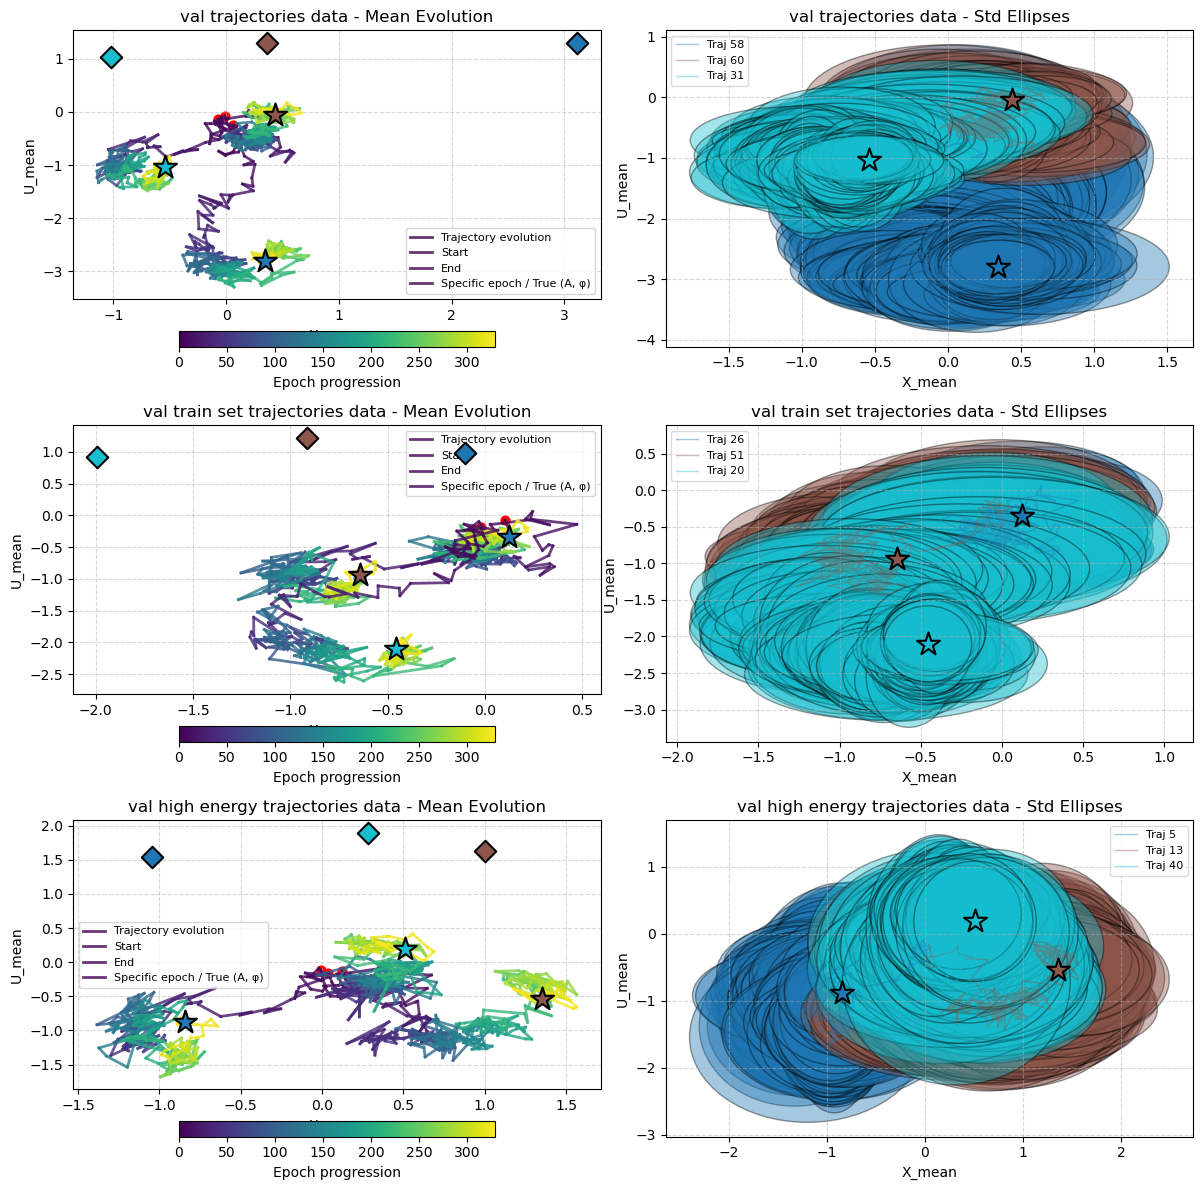


✅ Mean + Std (ellipse) visualization complete.


In [9]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_low_samples_added,val_id_df_added=val_id_df_low_samples_added,val_id_df_high_energy_added=val_id_df_high_energy_low_samples_added)

In [10]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_low_samples_added,
    val_id_df_added=val_id_df_low_samples_added,
    val_id_df_high_energy_added=val_id_df_high_energy_low_samples_added
)

📂 Using data from epoch: epoch_329
✅ Data extraction complete.


In [11]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['A']),
    y=torch.Tensor(val_train_differencies_set_df['phi']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.0025)

In [12]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

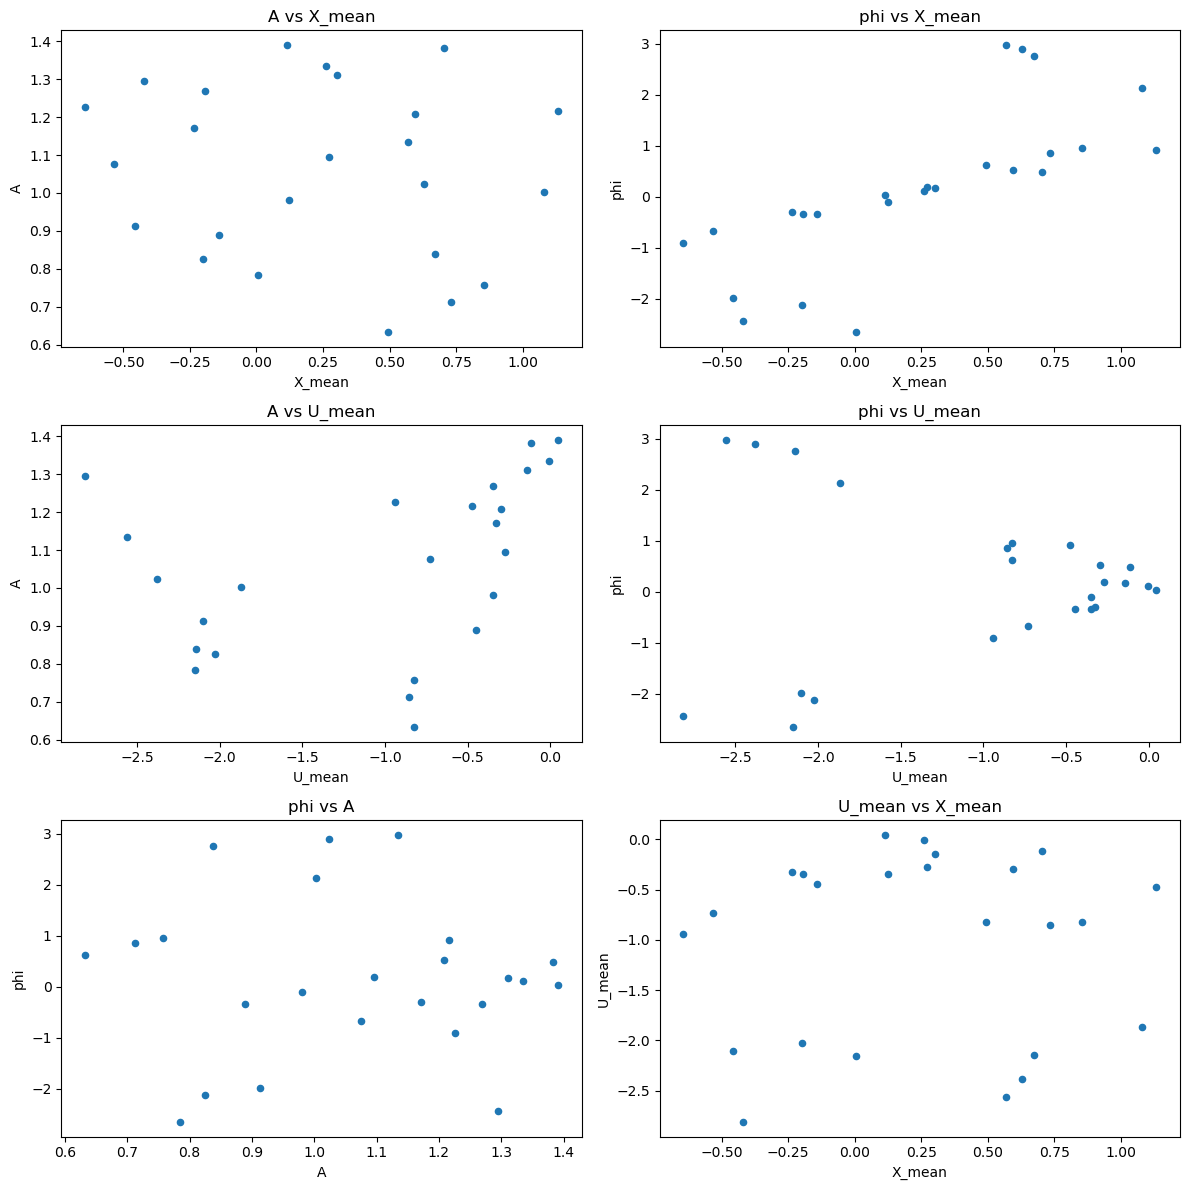

In [13]:
plot_differencies(val_train_differencies_set_df)

📊 Analyzing 330 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


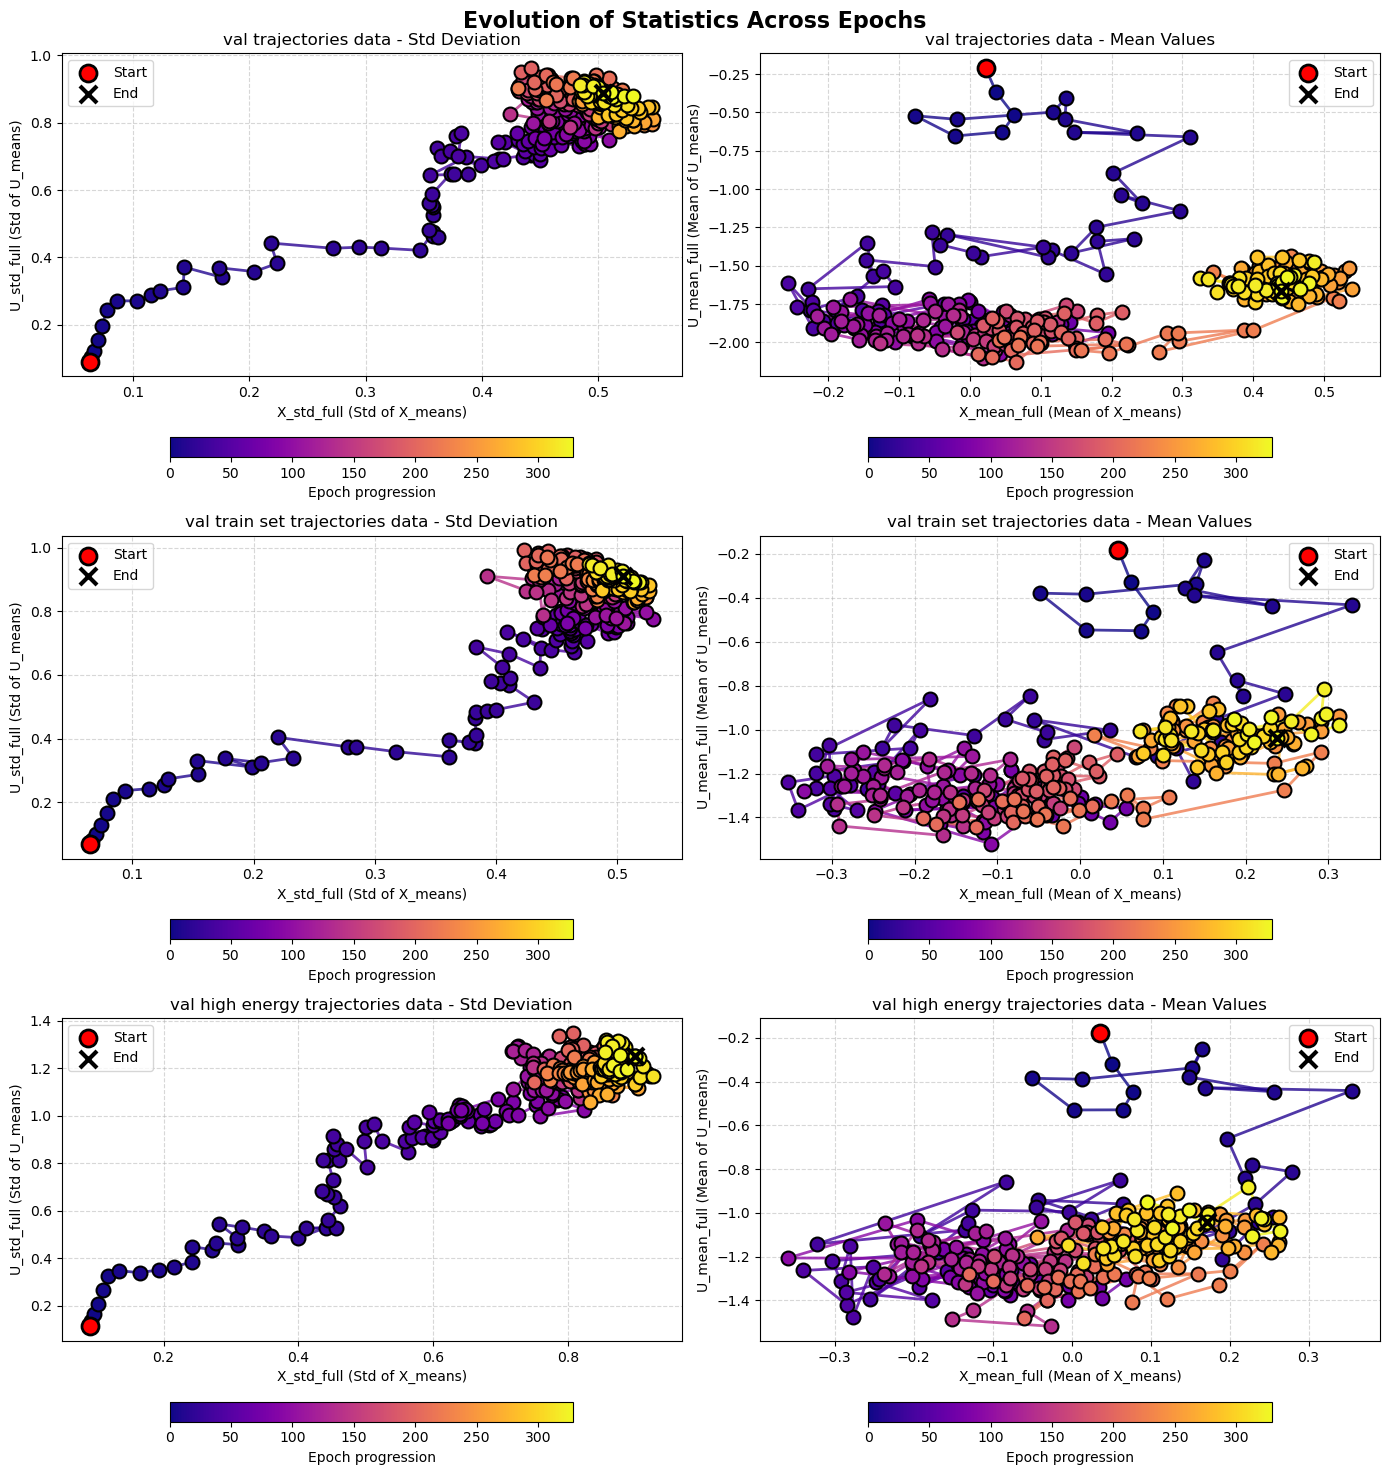

In [14]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [52]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [33, 60, 32],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    #final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
    use_layer_norm = False,
    
    # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,

    step_1_a_mean_innit= 1.2,
    step_2_a_mean_innit= 1.2,
    std_to_mean_ratio_a_mean_init= 0.0,

    step_1_gamma_mean_innit= 0.5,
    step_2_gamma_mean_innit= 0.5,
    std_to_mean_ratio_gamma_mean_init= 0.0,

    step_1_c1_mean_innit= 0.0,
    step_2_c1_mean_innit= 0.0,
    std_to_mean_ratio_c1_mean_init= 1.0,

    step_1_c2_mean_innit= 0.0,
    step_2_c2_mean_innit= 0.0,
    std_to_mean_ratio_c2_mean_init= 1.0,

    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "best_model.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:4084: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [16]:
test_canonical_tranformation_on_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, compute_jacobian_functional_function=compute_jacobian_functional, compute_symplectic_product_function=compute_symplectic_product, check_canonical_transformation_function=check_canonical_transformation, tolerance=1e-4, test_id_df=val_id_df_low_samples, test_df=val_df_low_samples, trajectory_id=57, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

For the mapping network:
✓ All 32 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 3.58e-07
For the inverse network:
✓ All 32 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 5.96e-07


In [17]:
print(f"Number of parameters are: {count_parameters(mapping_net)}, with number of training samples: {train_df_low_samples.shape[0]}\nThat is a ratio of parameters/samples of: {count_parameters(mapping_net)/train_df_low_samples.shape[0]}")

Number of parameters are: 82560, with number of training samples: 768
That is a ratio of parameters/samples of: 107.5


   num_observed_points  mean_loss
0                    1   0.244442
1                    2   0.660668
2                    3   0.443141
3                    4   0.337544
4                    5   0.295153
5                    6   0.244317
6                    7   0.207432
7                    8   0.185263
8                    9   0.179327
9                   10   0.166143


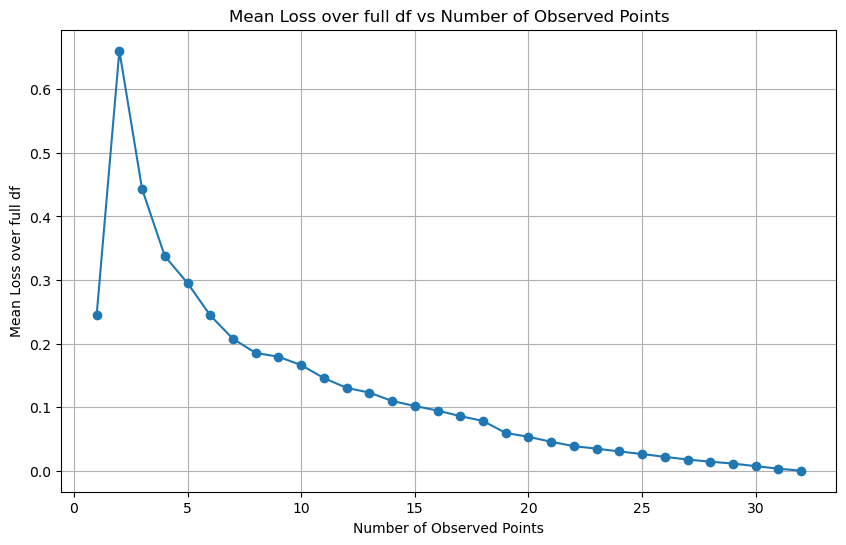

In [18]:
val_loss_per_points_df = test_model_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples, test_df=val_df_low_samples, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

   num_observed_points  mean_variance
0                    1       0.000000
1                    2       0.039190
2                    3       0.160772
3                    4       0.116822
4                    5       0.093431
5                    6       0.082507
6                    7       0.070724
7                    8       0.066912
8                    9       0.063076
9                   10       0.059984


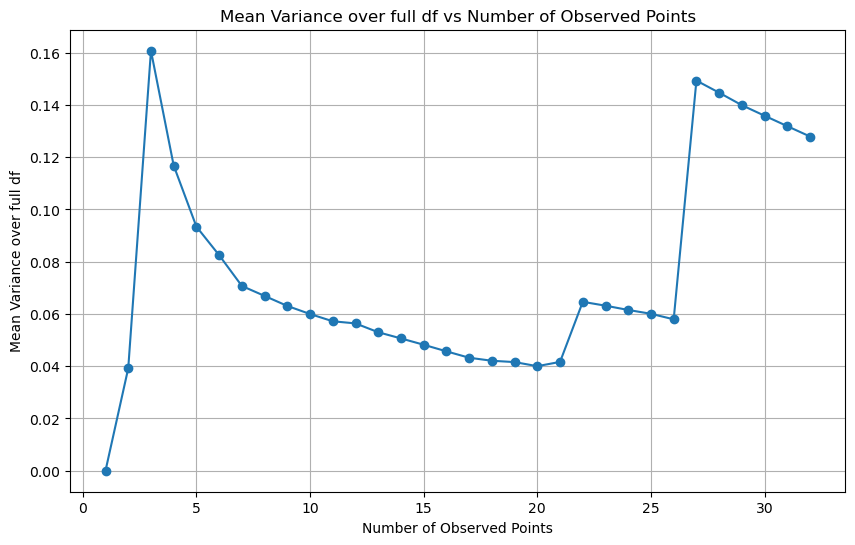

In [19]:
val_variance_per_points_df = test_model_variance_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id ,test_id_df=val_id_df_low_samples, test_df=val_df_low_samples, mapping_net=mapping_net ,device=device)

In [53]:
point_indexes_observed = [28]

In [22]:
k=1
mass=1
constant = -(k / mass)
omega = np.sqrt(-constant)
period = 2*np.pi/omega

    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
1               1  0.210811         0.170285              0.370877
3               3  0.232432         0.200590              0.416064
4               4  0.243243         0.206472              0.418640
7               7  0.275676         0.107064              0.203913
11             11  0.318919         0.178411              0.315922
16             16  0.372973         0.132424              0.216834
19             19  0.405405         0.115948              0.182103
22             22  0.437838         0.154160              0.232977
23             23  0.448649         0.196222              0.292950
27             27  0.491892         0.162757              0.232062
31             31  0.535135         0.243563              0.332950
32             32  0.545946         0.292740              0.396193
34             34  0.567568         0.152606              0.202564
38             38  0.610811         0.175040              0.22

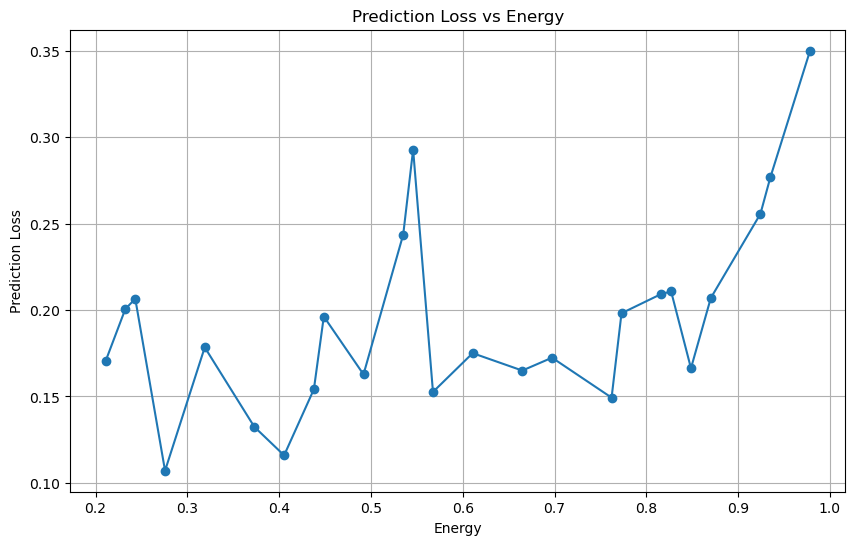

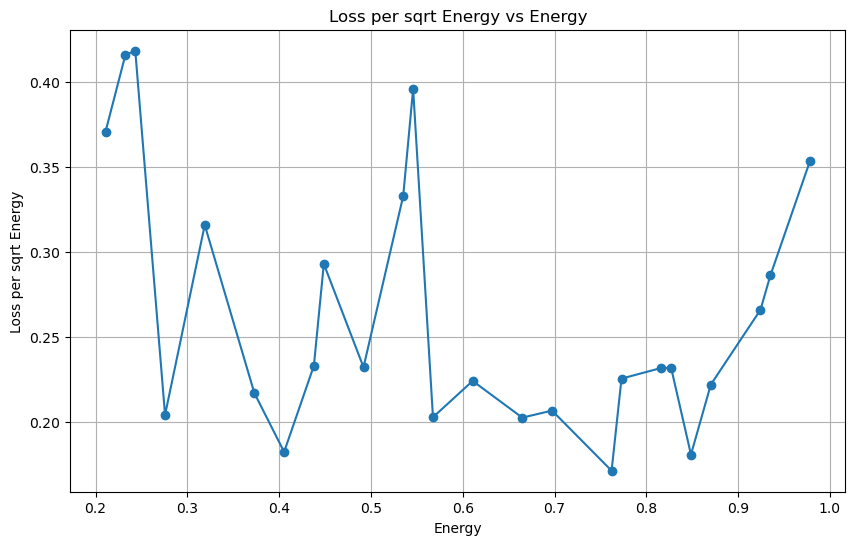

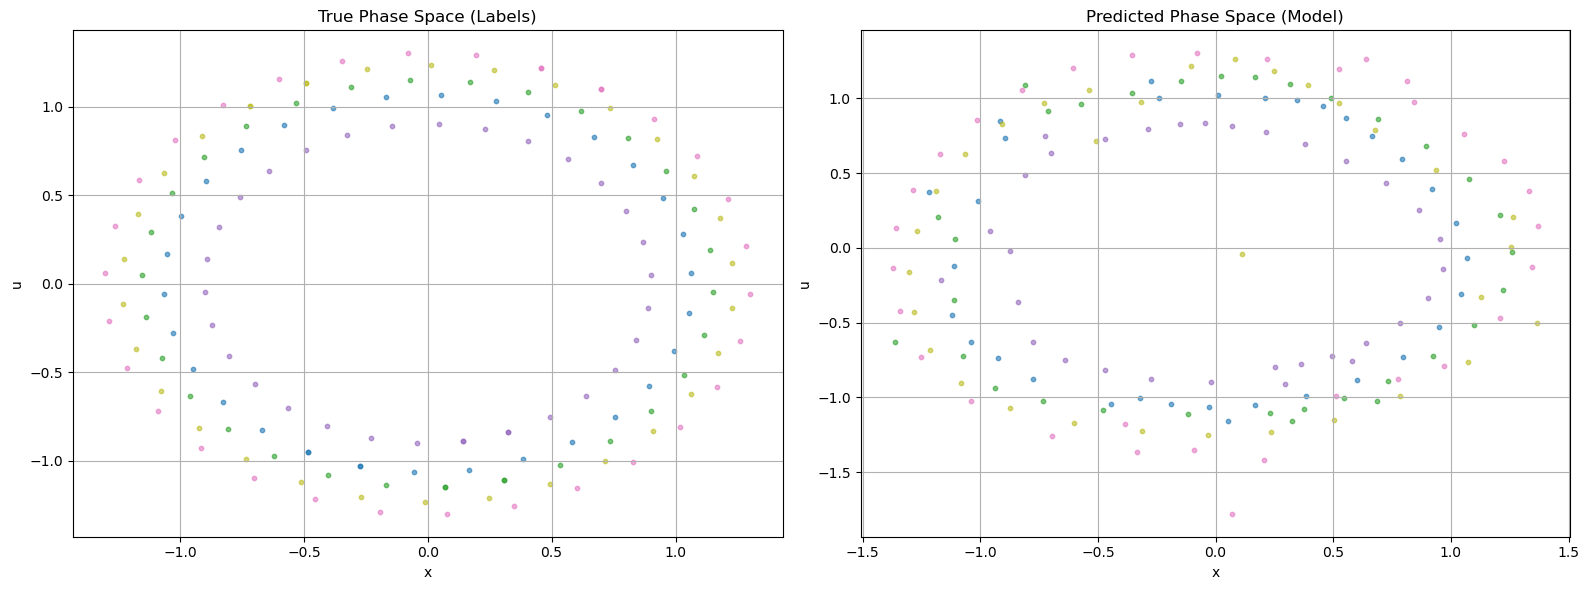

In [54]:
prediction_val_df, mean_prediction_loss_val, pred_val_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples, test_df=val_df_low_samples, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.2)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
1               1  0.210811            0.0                       0.0
3               3  0.232432            0.0                       0.0
4               4  0.243243            0.0                       0.0
7               7  0.275676            0.0                       0.0
11             11  0.318919            0.0                       0.0
16             16  0.372973            0.0                       0.0
19             19  0.405405            0.0                       0.0
22             22  0.437838            0.0                       0.0
23             23  0.448649            0.0                       0.0
27             27  0.491892            0.0                       0.0
31             31  0.535135            0.0                       0.0
32             32  0.545946            0.0                       0.0
34             34  0.567568            0.0                       0.0
38             38  0.610811       

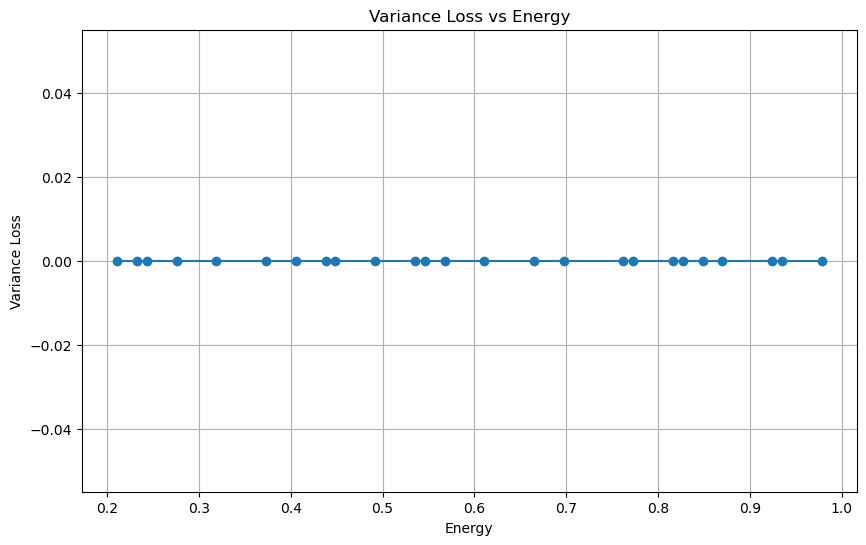

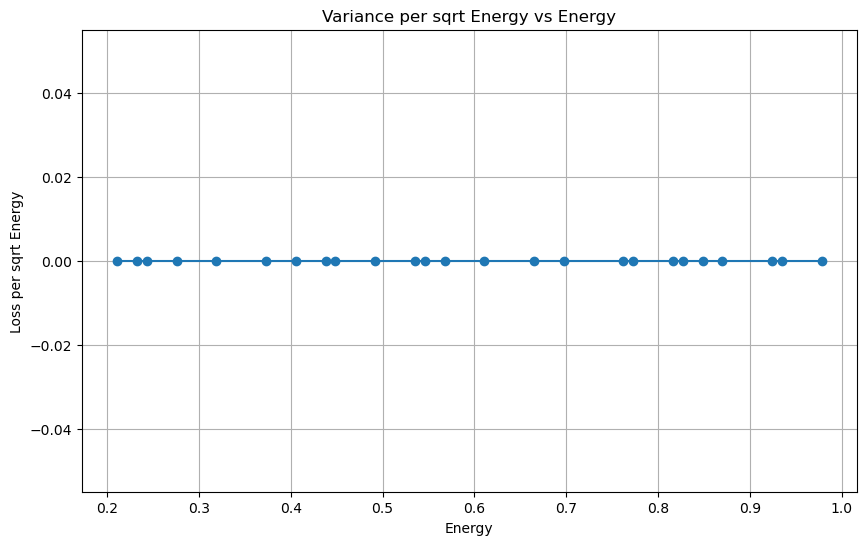

In [24]:
variance_val_df, mean_variance_loss_val = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=val_id_df_low_samples, test_df=val_df_low_samples, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [25]:
trajectory_id_val = 60

Observed time points: [5.8643064]


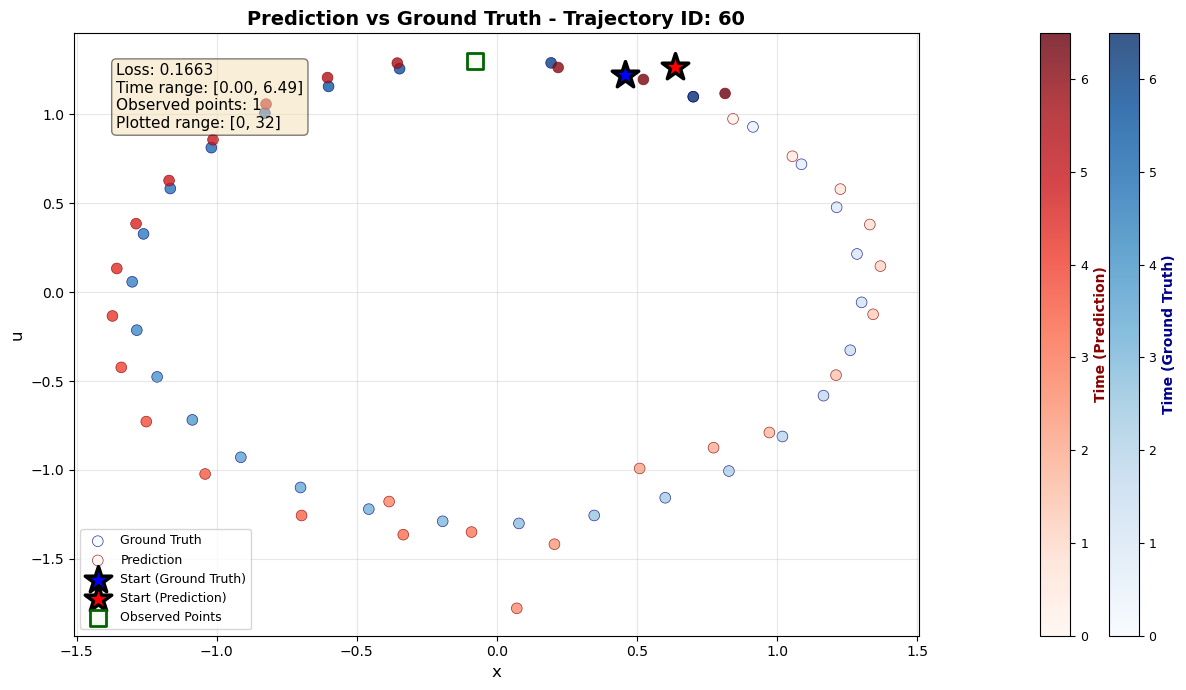

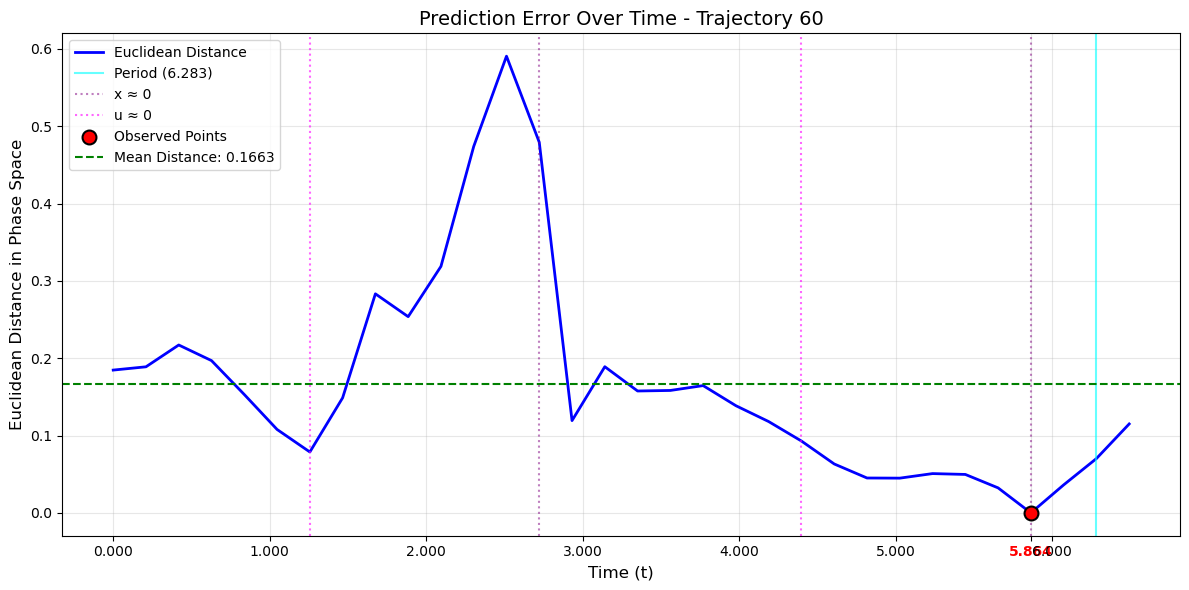

In [26]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples, test_df=val_df_low_samples, trajectory_id=trajectory_id_val, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=period)

    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
2               2  0.221622         0.154101              0.327341
6               6  0.264865         0.132866              0.258167
9               9  0.297297         0.134838              0.247296
12             12  0.329730         0.129663              0.225807
15             15  0.362162         0.148761              0.247193
17             17  0.383784         0.184129              0.297221
21             21  0.427027         0.150411              0.230171
24             24  0.459459         0.175061              0.258265
25             25  0.470270         0.120935              0.176352
29             29  0.513514         0.170004              0.237238
33             33  0.556757         0.192345              0.257780
36             36  0.589189         0.193093              0.251559
39             39  0.621622         0.227682              0.288779
40             40  0.632432         0.135613              0.17

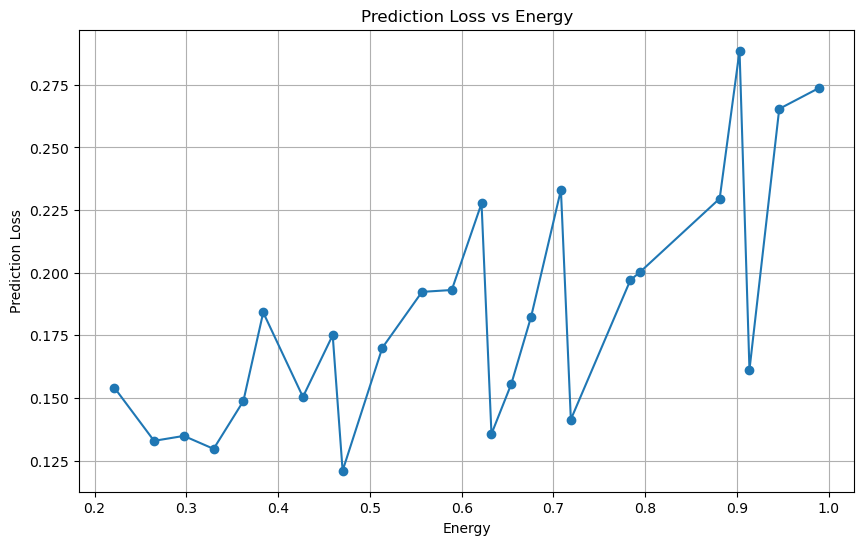

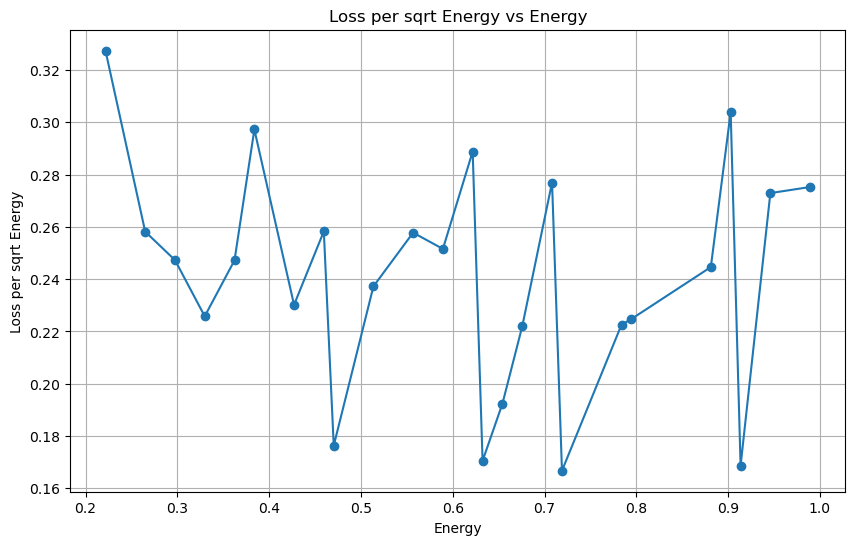

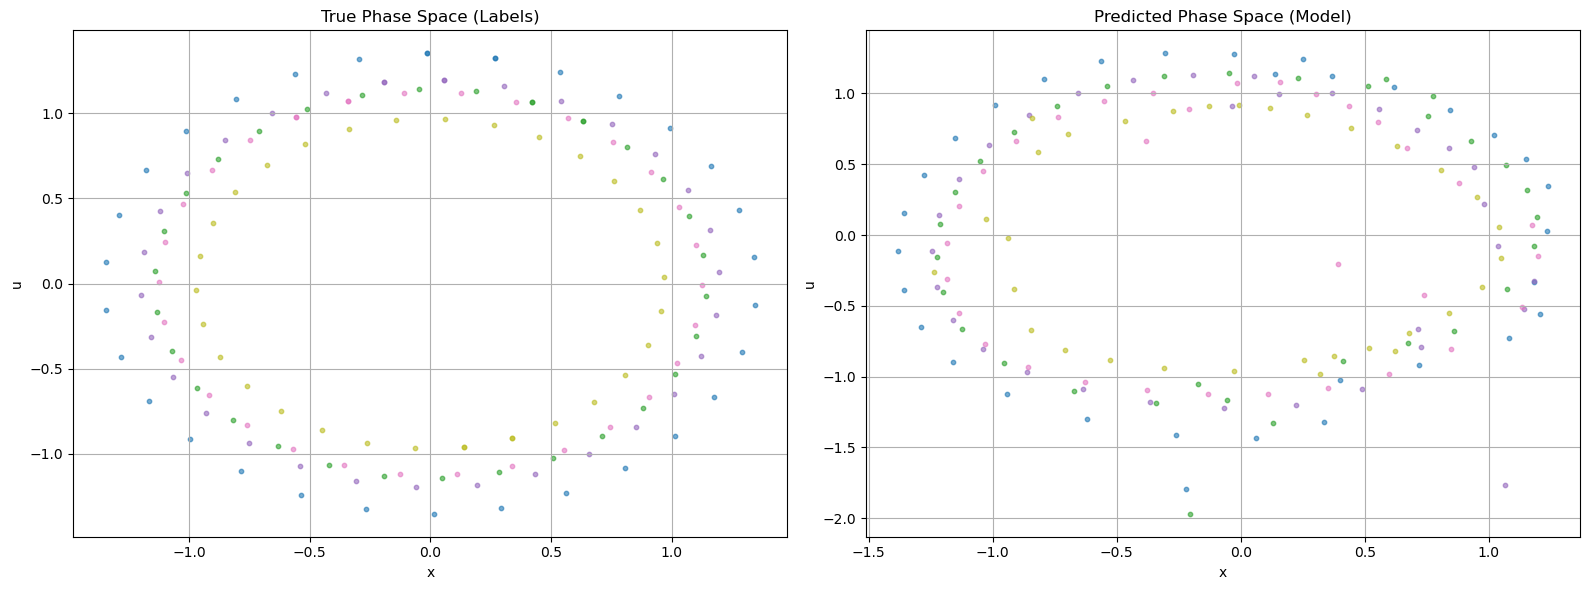

In [55]:
prediction_test_df, mean_prediction_loss_test, pred_test_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_low_samples, test_df=test_df_low_samples, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.2)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
2               2  0.221622            0.0                       0.0
6               6  0.264865            0.0                       0.0
9               9  0.297297            0.0                       0.0
12             12  0.329730            0.0                       0.0
15             15  0.362162            0.0                       0.0
17             17  0.383784            0.0                       0.0
21             21  0.427027            0.0                       0.0
24             24  0.459459            0.0                       0.0
25             25  0.470270            0.0                       0.0
29             29  0.513514            0.0                       0.0
33             33  0.556757            0.0                       0.0
36             36  0.589189            0.0                       0.0
39             39  0.621622            0.0                       0.0
40             40  0.632432       

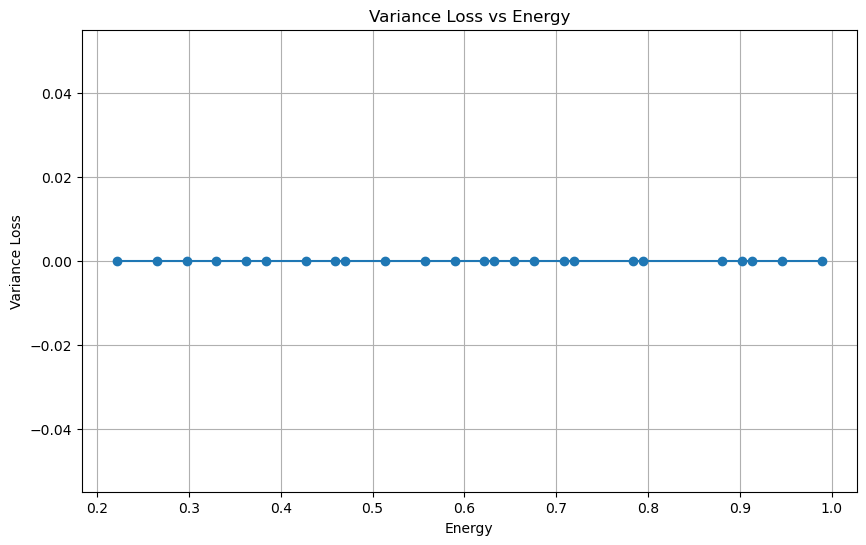

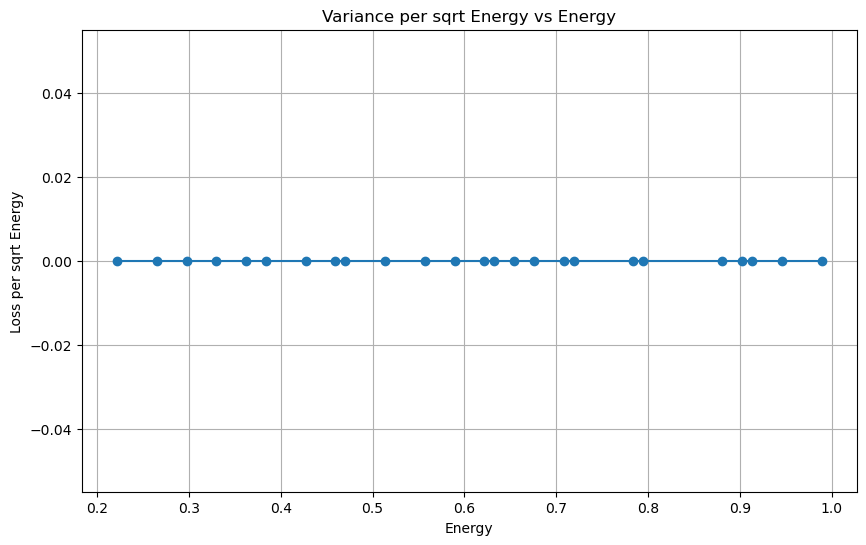

In [41]:
variance_test_df, mean_variance_loss_test = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_low_samples, test_df=test_df_low_samples, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [28]:
trajectory_id_test = 48

Observed time points: [5.8643064]


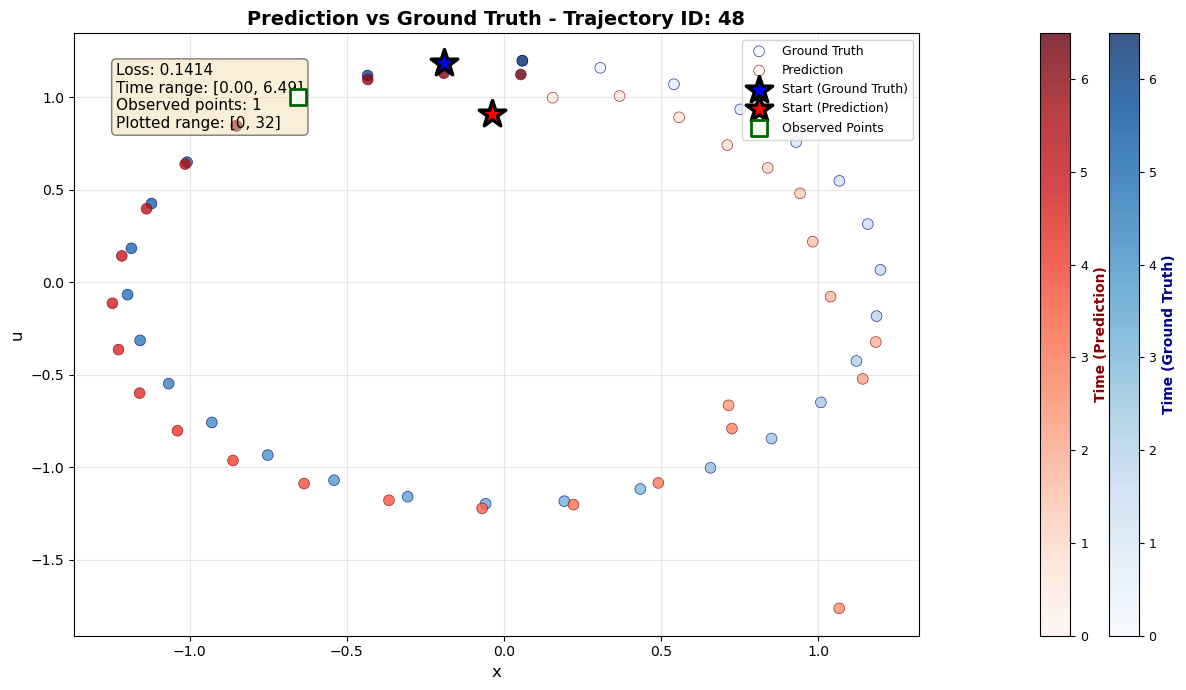

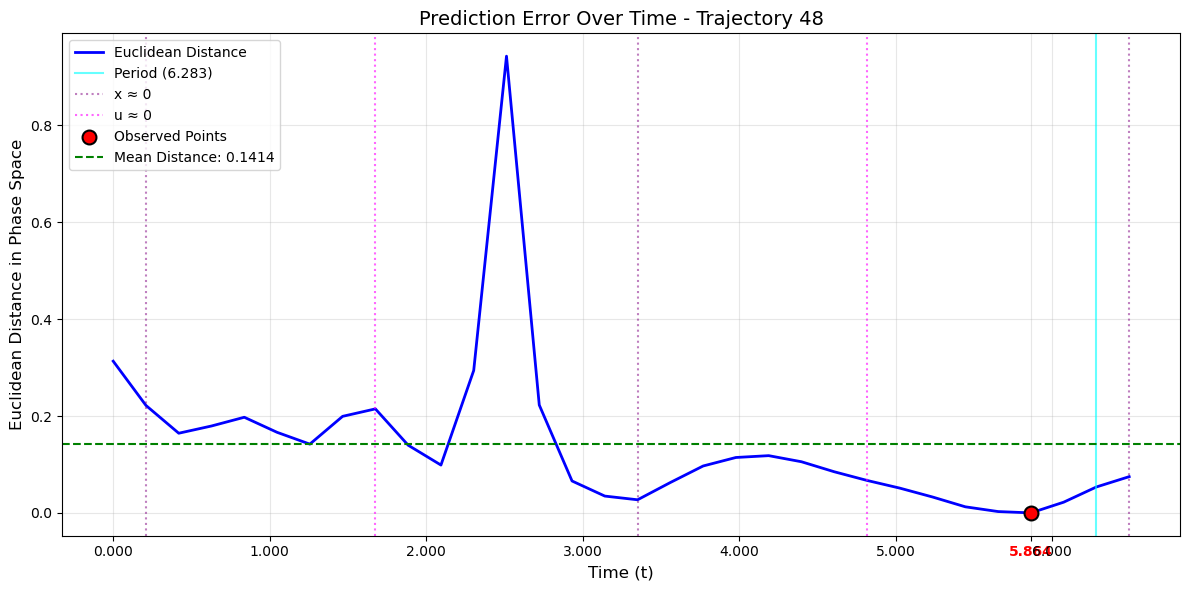

In [29]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_low_samples, test_df=test_df_low_samples, trajectory_id=trajectory_id_test, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=period)

In [30]:
print(f"The max energy of a trajectory in the training set is: {train_id_df_low_samples['energy'].max():.3f}\nThe high energy testing set has energies in the range: {test_id_df_high_energy_low_samples['energy'].min():.3f}-{test_id_df_high_energy_low_samples['energy'].max():.3f}")

The max energy of a trajectory in the training set is: 0.968
The high energy testing set has energies in the range: 1.118-1.942


In [33]:
point_indexes_observed_high_energy = [24]

    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
1               1  1.117551         0.151708              0.143508
2               2  1.135102         0.365136              0.342718
4               4  1.170204         0.157684              0.145766
6               6  1.205306         0.338510              0.308335
7               7  1.222857         0.196571              0.177759
12             12  1.310612         0.380590              0.332446
14             14  1.345714         0.406053              0.350031
15             15  1.363265         0.249620              0.213791
17             17  1.398367         0.190781              0.161334
19             19  1.433469         0.453414              0.378705
20             20  1.451020         0.293595              0.243731
21             21  1.468571         0.466247              0.384741
23             23  1.503673         0.539422              0.439898
24             24  1.521224         0.629781              0.51

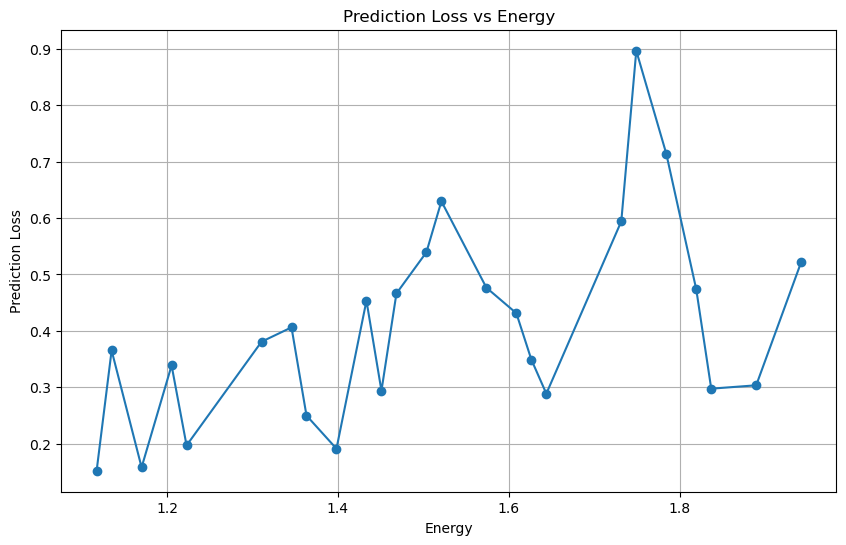

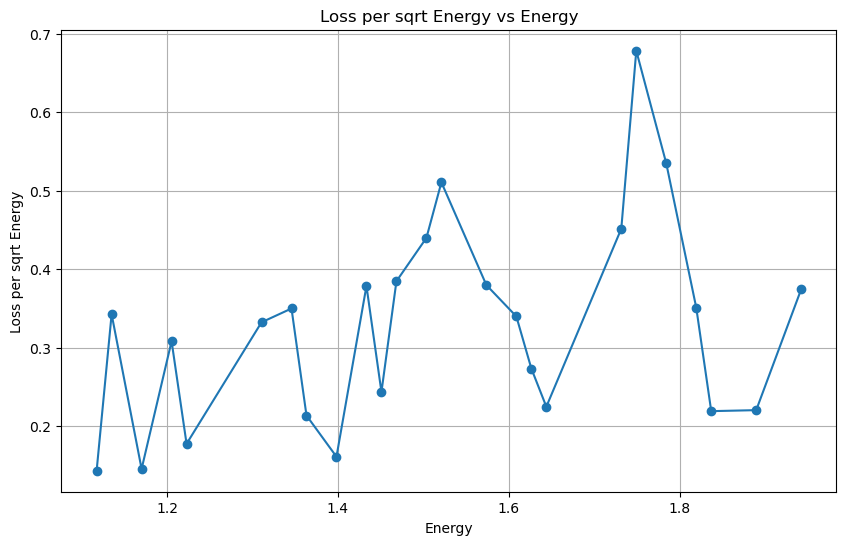

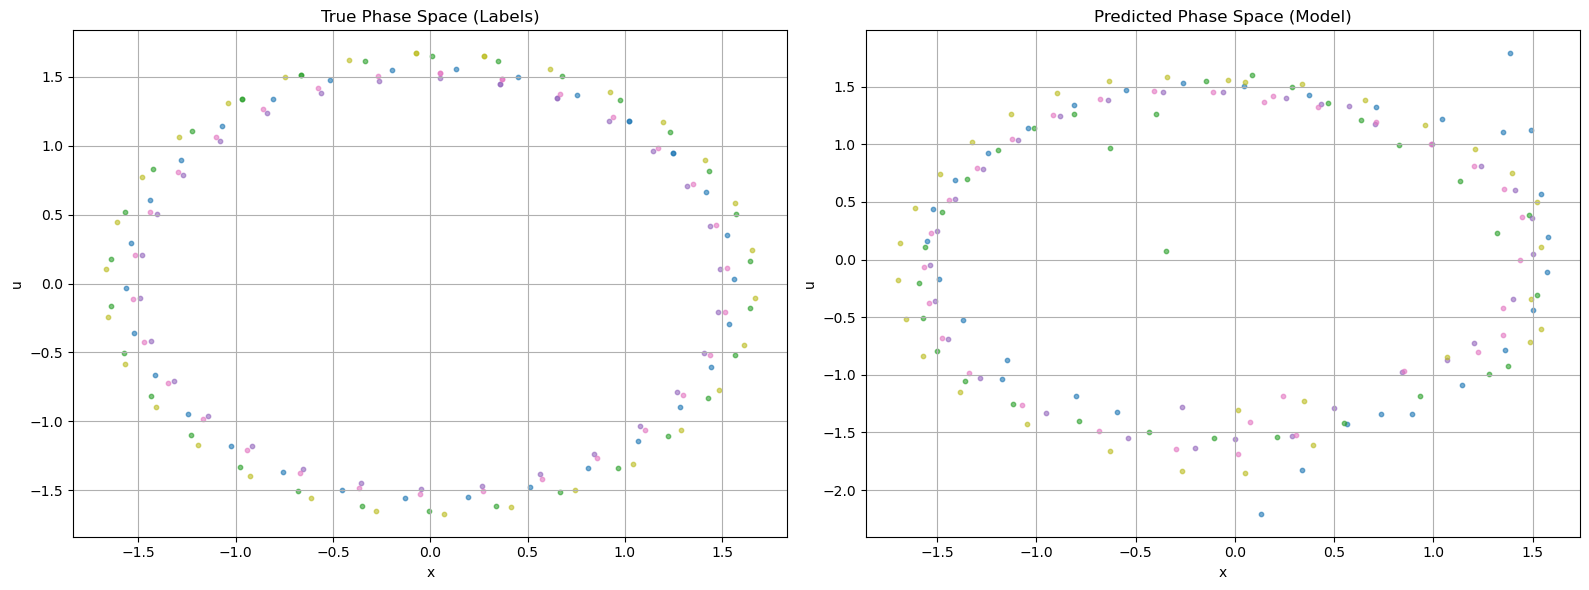

In [56]:
prediction_test_high_energy_df, mean_prediction_loss_test_high_energy, pred_test_high_energy_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_low_samples, test_df=test_df_high_energy_low_samples, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.2)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
1               1  1.117551            0.0                       0.0
2               2  1.135102            0.0                       0.0
4               4  1.170204            0.0                       0.0
6               6  1.205306            0.0                       0.0
7               7  1.222857            0.0                       0.0
12             12  1.310612            0.0                       0.0
14             14  1.345714            0.0                       0.0
15             15  1.363265            0.0                       0.0
17             17  1.398367            0.0                       0.0
19             19  1.433469            0.0                       0.0
20             20  1.451020            0.0                       0.0
21             21  1.468571            0.0                       0.0
23             23  1.503673            0.0                       0.0
24             24  1.521224       

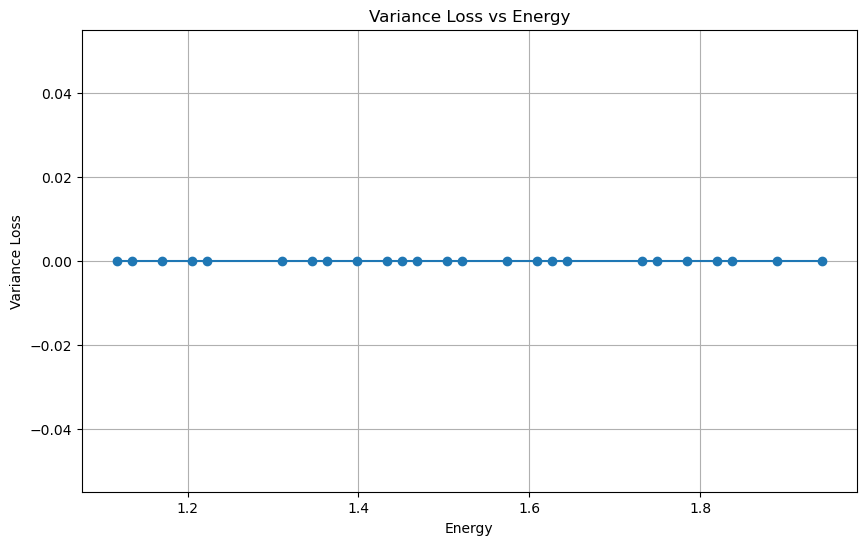

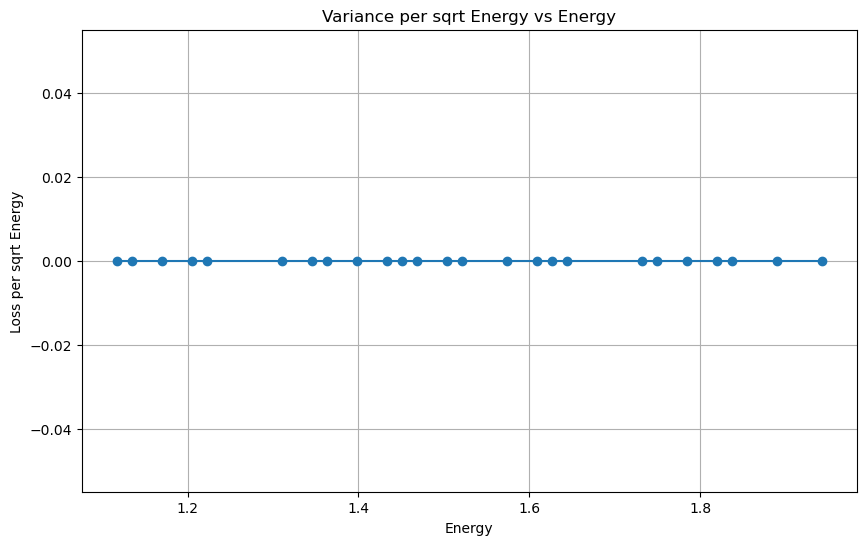

In [36]:
variance_test_high_energy_df, mean_variance_loss_test_high_energy = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_high_energy_low_samples, test_df=test_df_high_energy_low_samples, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed_high_energy)


In [37]:
trajectory_id_high_energy = 45

Observed time points: [5.0265484]


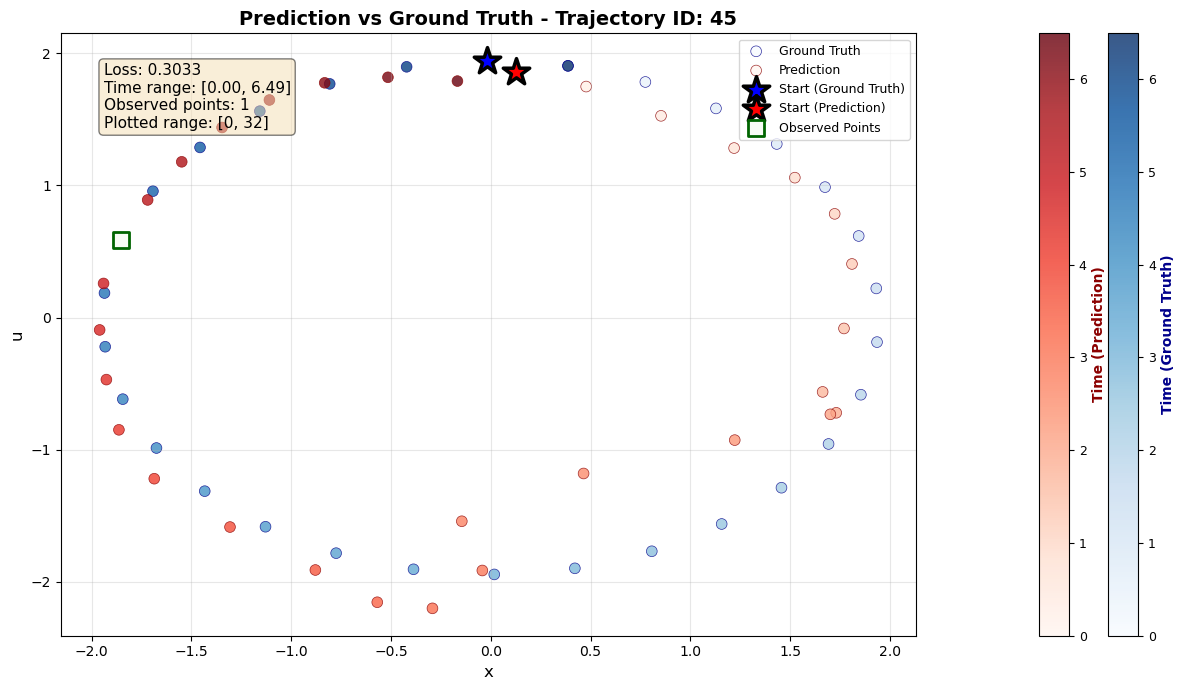

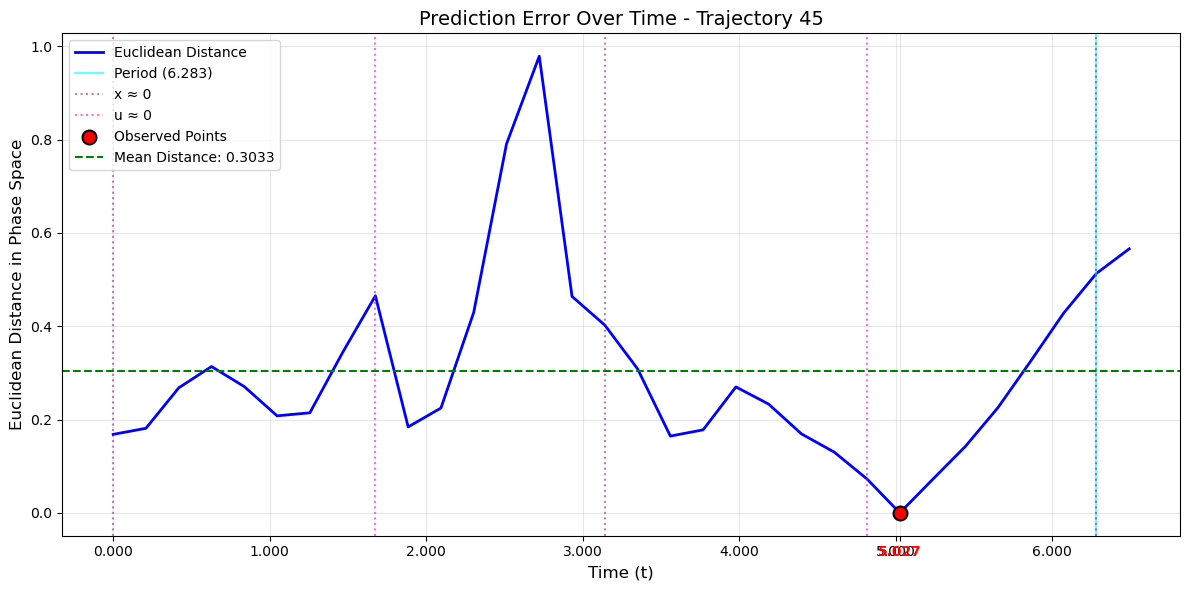

In [38]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_low_samples, test_df=test_df_high_energy_low_samples, trajectory_id=trajectory_id_high_energy, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=period)

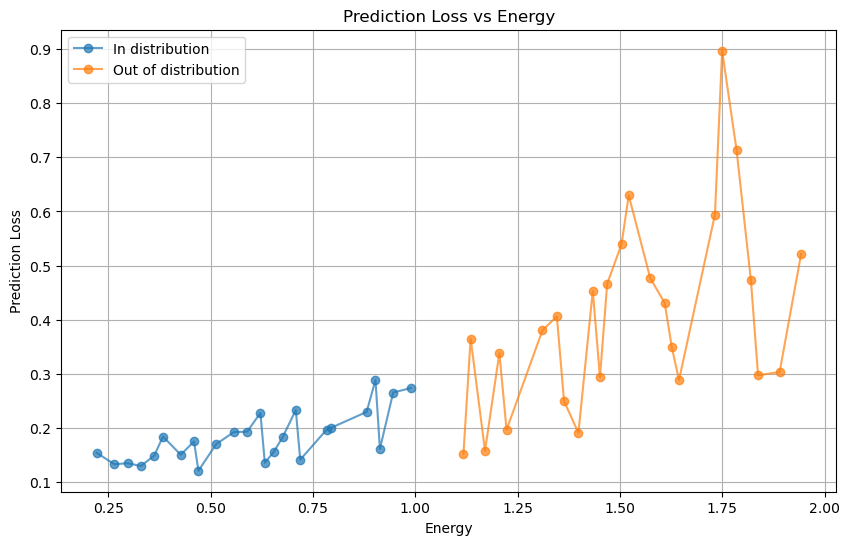

In [57]:
plot_prediction_losses([prediction_test_df, prediction_test_high_energy_df])

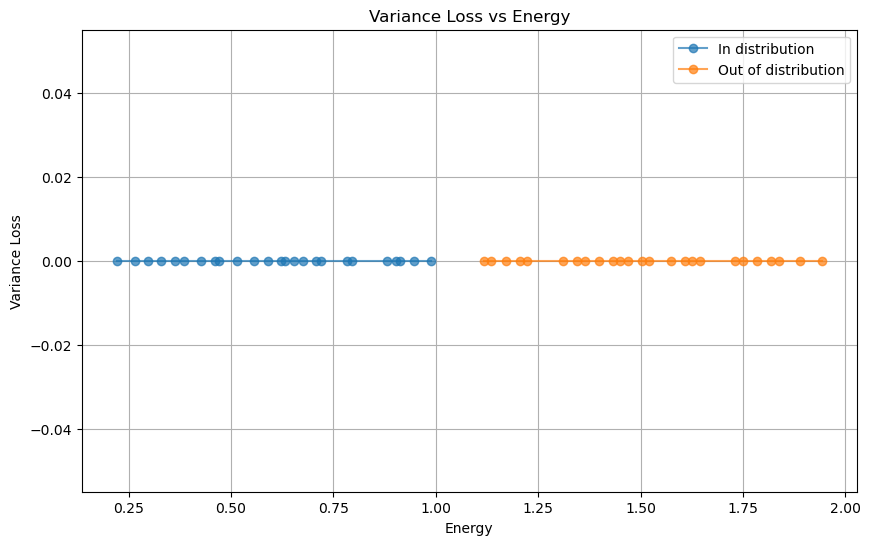

In [42]:
plot_variance_losses([variance_test_df, variance_test_high_energy_df])

Step 1 gamma values mean: 0.580±0.041

Step 2 gamma values mean: 0.611±0.033



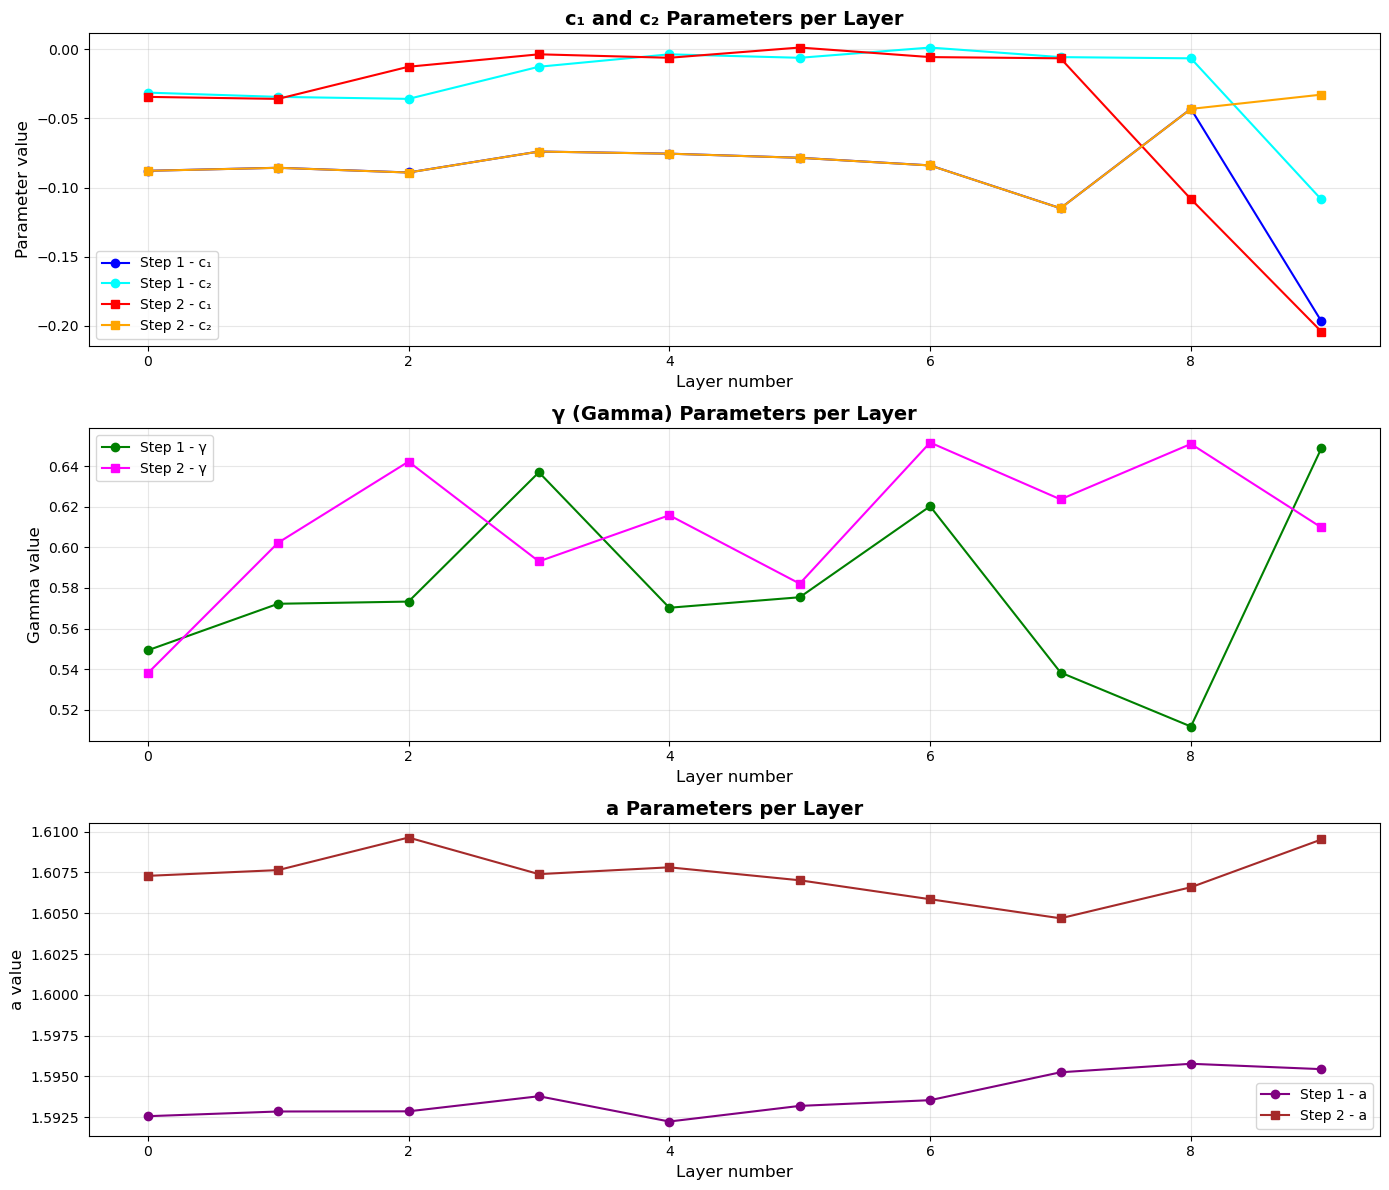

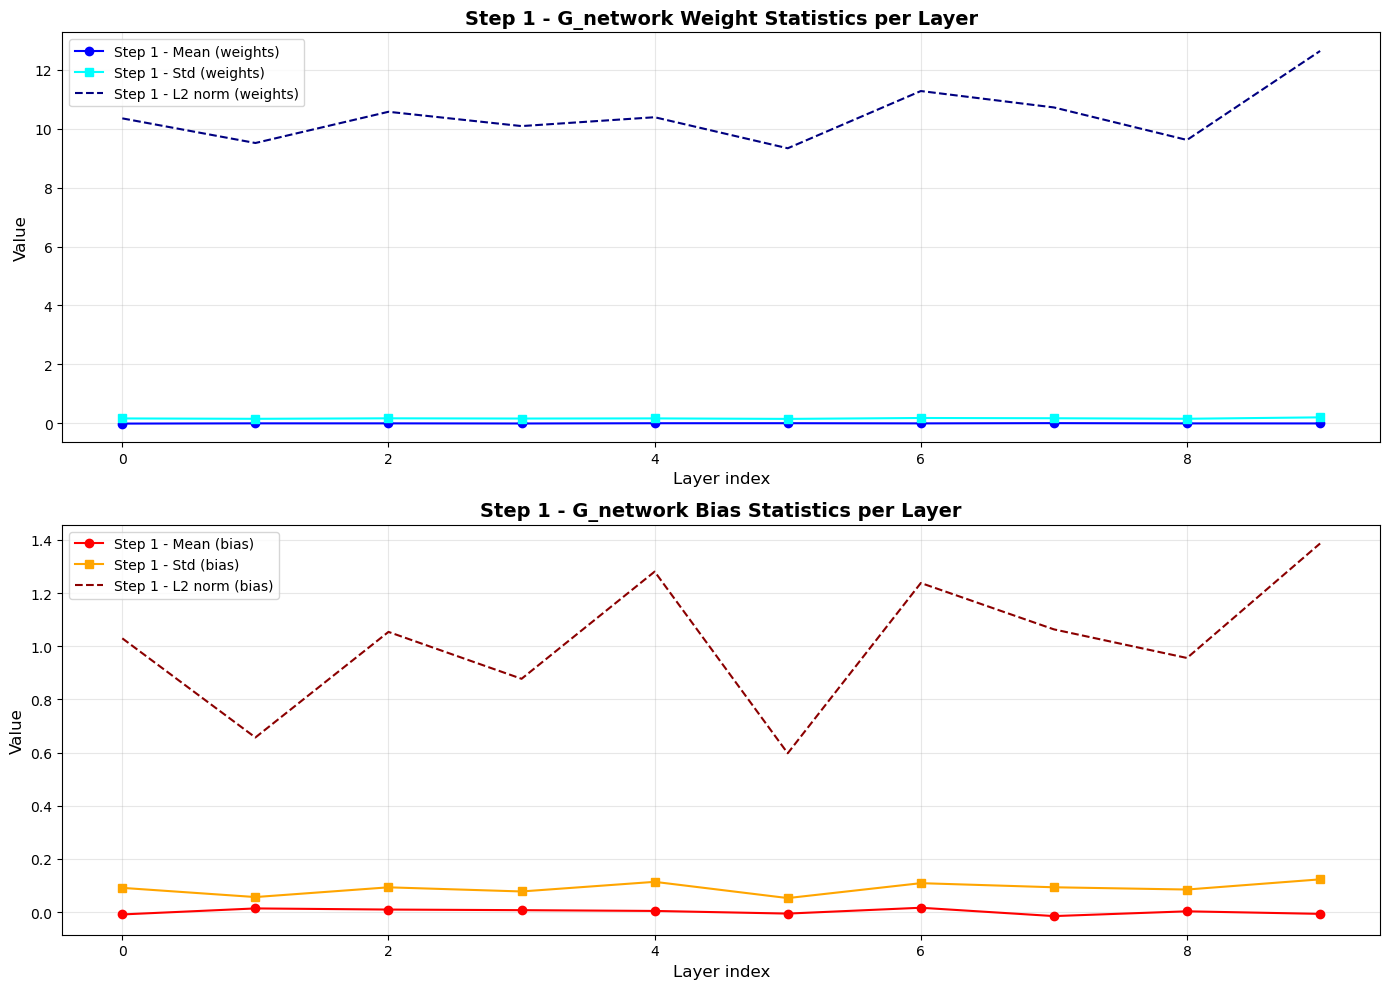

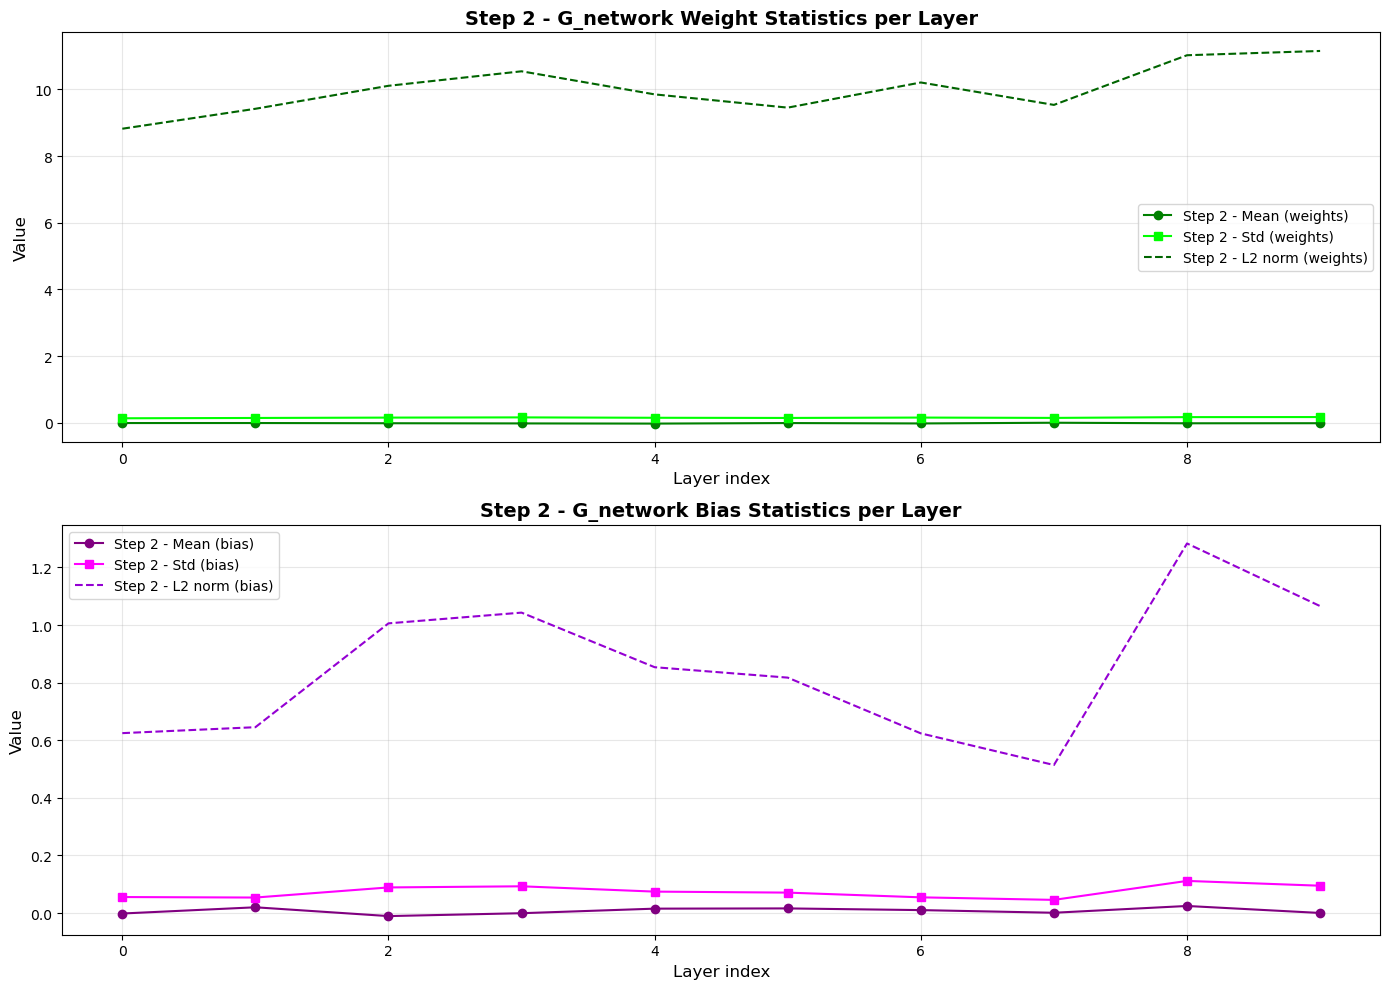

In [43]:
param_data = analyze_mapping_net(mapping_net, return_lists=True)
